 <p style= "background-color:#f6a85e;font-family:Arial;color:#FFFFFF;font-size:200%;text-align:center;border-radius:20px 20px;border-style:solid;border-width:10px;border-color:#f6a85e;"><b>Análisis de Segmentación de Clientes</b></p>


**_Pablo Arriagada Ojeda_ | 2023**


El Análisis de la Personalidad del Cliente es un estudio detallado de los clientes ideales de una empresa. Ayuda a la empresa a comprender mejor a sus clientes y facilita la adaptación de los productos de acuerdo a las necesidades, comportamientos y preocupaciones específicas de diferentes tipos de clientes.

El análisis de la personalidad del cliente ayuda a la empresa a adaptar sus productos en función de su público objetivo, que proviene de diferentes segmentos de clientes. Por ejemplo, en lugar de gastar dinero en promocionar un nuevo producto a todos los clientes en la base de datos de la empresa, la compañía puede analizar qué segmento de clientes es más probable que compre el producto y luego promocionar el producto solo en ese segmento en particular.
&nbsp;
&nbsp;
## Objetivo
Nuestro objetivo principal es segmentar a los clientes, con el objetivo de conocer a quiénes le venderemos y, así, plantear estrategias comerciales acorde a nuestros clientes.

Como estamos haciendo un proyecto investigativo y exploratorio, trabajaremos en base a aprendizaje no supervisado.
&nbsp;
***
## Variables
### Cliente
-    ID: Identificador.
-    Year_Birth: Año de nacimiento.
-    Education: Nivel educacional.
-    Marital_Status: Estado civil.
-    Income: Ingreso anual total del hogar.
-    Kidhome: Número de niñ@s en casa.
-    Teenhome: Número de adolescentes en casa.
-    Dt_Customer: Fecha del ingreso del cliente a la compañía.
-    Recency: Cantidad de días luego de la última compra.
-    Complain: 1 si el cliente dejó un reclamo en los últimos 2 años, 0 si no.

### Productos
-    MntWines: Cantidad gastada en vino durante los últimos 2 años.
-    MntFruits: Cantidad gastada en frutas durante los últimos 2 años.
-    MntMeatProducts: Cantidad gastada en carne durante los últimos 2 años.
-    MntFishProducts: Cantidad gastada en pescado durante los últimos 2 años.
-    MntSweetProducts: Cantidad gastada en dulces durante los últimos 2 años.
-    MntGoldProds: Cantidad gastada en oro durante los últimos 2 años.

### Promociones
-    NumDealsPurchases: Número de compras realizadas con descuento.
-    AcceptedCmp1: 1 si el cliente aceptó la oferta en la primera campaña, 0 si no.
-    AcceptedCmp2: 1 si el cliente aceptó la oferta en la segunda campaña, 0 si no.
-    AcceptedCmp3: 1 si el cliente aceptó la oferta en la tercera campaña, 0 si no.
-    AcceptedCmp4: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 si no.
-    AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 si no.
-    Response: 1 si el cliente aceptó la oferta en la última campaña, 0 si no.

### Tienda
-    NumWebPurchases: Número de compras hechas a través del sitio web de la compañía.
-    NumCatalogPurchases: Número de compras hechas usando un catálogo.
-    NumStorePurchases: Número de compras hechas directamente en la tienda.
-    NumWebVisitsMonth: Número de visitas al sitio web de la compañía en el úlitmo mes.
***

Al leer los nombres de las columnas, además de la complejidad de algunos nombres, resulta complejo establecer una regla general para los nombres, _-algunas escritas en snake_case y otras en una especie de camelCase-_, por lo que será necesario renombrar las columnas a nuestra conveniencia.


# Lectura de datos

In [1]:
#Importar librerías.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep= '\t')
df_og = df.copy()

In [3]:
dimensiones = df.shape
print(f'El dataframe "df" contiene {dimensiones[0]} filas y {dimensiones[1]} columnas.')

El dataframe "df" contiene 2240 filas y 29 columnas.


In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
columnas_categoricas= df.select_dtypes(include= ['object'])
columnas_categoricas.describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.Income.isnull().sum()

24

### Resumen de lectura de datos

- Hay 2240 filas y 29 columnas
- De las 29 columnas, solo 3 son de tipo 'object', las cuales pueden ser codificadas.
- Solamente existen 24 datos faltantes en la columna 'Income', los que serán eliminados.
- Los nombres de las columnas son confusos de leer.

***

# Data Cleaning

In [9]:
nombres_actualizados = {'ID': 'id',
                        'Year_Birth': 'year_birth',
                        'Education': 'education',
                        'Marital_Status': 'marital_status',
                        'Income': 'income',
                        'Kidhome': 'kid_home',
                        'Teenhome': 'teen_home',
                        'Dt_Customer': 'customer_since',
                        'Recency': 'recency',
                        'MntWines': 'wines',
                        'MntFruits': 'fruits',
                        'MntMeatProducts': 'meat',
                        'MntFishProducts': 'fish',
                        'MntSweetProducts': 'sweets',
                        'MntGoldProds': 'gold',
                        'NumDealsPurchases': 'num_discount_purchases',
                        'NumWebPurchases': 'num_web_purchases',
                        'NumCatalogPurchases': 'num_catalog_purchases',
                        'NumStorePurchases': 'num_store_purchases',
                        'NumWebVisitsMonth': 'num_web_visits',
                        'AcceptedCmp3': 'campaign_3',
                        'AcceptedCmp4': 'campaign_4',
                        'AcceptedCmp5': 'campaign_5',
                        'AcceptedCmp1': 'campaign_1',
                        'AcceptedCmp2': 'campaign_2',
                        'Complain': 'complain',
                        'Z_CostContact': 'z_cost_contact',
                        'Z_Revenue': 'z_revenue',
                        'Response': 'response'}

df.rename(columns= nombres_actualizados, inplace= True)
df.head()

,id,year_birth,education,marital_status,income,kid_home,teen_home,customer_since,recency,wines,...,num_web_visits,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


- Hay algunas variables que son redundantes para este modelo de clasificación, como kid_home y teen_home, que se pueden fusionar a una sola columna que entregue la cantidad de hijos que tiene un cliente.


In [10]:
#Crear nueva columna 'children' y borrar kid_home y teen_home

df['children'] = df['kid_home'] + df['teen_home']
df.insert(5, 'children', df.pop('children'))
df.drop(columns= ['kid_home', 'teen_home'], inplace= True)

df.head()

,id,year_birth,education,marital_status,income,children,customer_since,recency,wines,fruits,...,num_web_visits,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,z_cost_contact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,2,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [11]:
#Convierte la columna 'year_birth' a 'age', asignando la edad al año 2023.

año_actual = datetime.now().year

df['age'] = año_actual - df['year_birth']
df.insert(1, 'age', df.pop('age'))
df.drop(columns= 'year_birth', inplace= True)

df.head()

,id,age,education,marital_status,income,children,customer_since,recency,wines,fruits,...,num_web_visits,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,z_cost_contact,z_revenue,response
0,5524,66,Graduation,Single,58138.0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,69,Graduation,Single,46344.0,2,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,58,Graduation,Together,71613.0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,39,Graduation,Together,26646.0,1,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,42,PhD,Married,58293.0,1,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [12]:
#Convierte la columna 'customer_since' a formate datetime

df['customer_for'] = pd.to_datetime(df['customer_since'], format='%d-%m-%Y')

fecha_actual = datetime.now()

df['customer_for'] = (fecha_actual - df['customer_for']).dt.days

df.insert(6, 'customer_for', df.pop('customer_for'))
df.drop(columns= 'customer_since', inplace= True)

df.head()

,id,age,education,marital_status,income,children,customer_for,recency,wines,fruits,...,num_web_visits,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,z_cost_contact,z_revenue,response
0,5524,66,Graduation,Single,58138.0,0,4023,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,69,Graduation,Single,46344.0,2,3473,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,58,Graduation,Together,71613.0,0,3672,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,39,Graduation,Together,26646.0,1,3499,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,42,PhD,Married,58293.0,1,3521,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df['spent'] = df['wines'] + df['fruits'] + df['meat'] +df['fish'] + df['sweets'] + df['gold'] 

In [14]:
df.drop(columns= ['wines', 'fruits', 'meat', 'fish', 'sweets', 'gold'], inplace=True)

In [15]:
df.head()

,id,age,education,marital_status,income,children,customer_for,recency,num_discount_purchases,num_web_purchases,...,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,z_cost_contact,z_revenue,response,spent
0,5524,66,Graduation,Single,58138.0,0,4023,58,3,8,...,0,0,0,0,0,0,3,11,1,1617
1,2174,69,Graduation,Single,46344.0,2,3473,38,2,1,...,0,0,0,0,0,0,3,11,0,27
2,4141,58,Graduation,Together,71613.0,0,3672,26,1,8,...,0,0,0,0,0,0,3,11,0,776
3,6182,39,Graduation,Together,26646.0,1,3499,26,2,2,...,0,0,0,0,0,0,3,11,0,53
4,5324,42,PhD,Married,58293.0,1,3521,94,5,5,...,0,0,0,0,0,0,3,11,0,422


In [16]:
#¿Cuáles son los datos que manejan las variables z_revenue y z_cost_contact?

cost_contact= df.z_cost_contact.value_counts()
revenue= df.z_revenue.value_counts()

print(f'{cost_contact}\n\n{revenue}')

3    2240
Name: z_cost_contact, dtype: int64

11    2240
Name: z_revenue, dtype: int64


In [17]:
#Borrar las columnas que no aporten información relevante para el modelo de clasificación.

df.drop(columns= ['id', 'z_cost_contact', 'z_revenue'], inplace= True)

In [18]:
df.dropna(inplace= True)

In [19]:
df.reset_index(inplace= True)

In [20]:
df.drop(columns= 'index', inplace= True)
df

,age,education,marital_status,income,children,customer_for,recency,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits,campaign_3,campaign_4,campaign_5,campaign_1,campaign_2,complain,response,spent
0,66,Graduation,Single,58138.0,0,4023,58,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,69,Graduation,Single,46344.0,2,3473,38,2,1,1,2,5,0,0,0,0,0,0,0,27
2,58,Graduation,Together,71613.0,0,3672,26,1,8,2,10,4,0,0,0,0,0,0,0,776
3,39,Graduation,Together,26646.0,1,3499,26,2,2,0,4,6,0,0,0,0,0,0,0,53
4,42,PhD,Married,58293.0,1,3521,94,5,5,3,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,56,Graduation,Married,61223.0,1,3741,46,2,9,3,4,5,0,0,0,0,0,0,0,1341
2212,77,PhD,Together,64014.0,3,3379,56,7,8,2,5,7,0,0,0,1,0,0,0,444
2213,42,Graduation,Divorced,56981.0,0,3515,91,1,2,3,13,6,0,1,0,0,0,0,0,1241
2214,67,Master,Together,69245.0,1,3516,8,2,6,5,10,3,0,0,0,0,0,0,0,843


#### Encoding de variables categóricas

#### 'education'

In [21]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [22]:
df['education'] = df['education'].replace(['PhD','2n Cycle','Graduation', 'Master'], 'Postgraduate')  
df['education'] = df['education'].replace(['Basic'], 'Undergraduate')

#### 'marital_status'

In [23]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
df['marital_status'] = df['marital_status'].replace(['Married', 'Together'], 'Relationship')
df['marital_status'] = df['marital_status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd', 'Single'], 'Single')

#### Aceptación de campañas

In [25]:
df['accepted_campaign'] = 0

for index, row in df.iterrows():
    if row['campaign_1'] == 1:
        df.at[index, 'accepted_campaign'] = 1
    elif row['campaign_2'] == 1:
        df.at[index, 'accepted_campaign'] = 2
    elif row['campaign_3'] == 1:
        df.at[index, 'accepted_campaign'] = 3
    elif row['campaign_4'] == 1:
        df.at[index, 'accepted_campaign'] = 4
    elif row['campaign_5'] == 1:
        df.at[index, 'accepted_campaign'] = 5
    elif row['response'] ==1:
        df.at[index, 'accepted_campaign'] = 6

In [26]:
df.drop(columns= ['campaign_1', 'campaign_2', 'campaign_3', 'campaign_4', 'campaign_5', 'response'], inplace= True)

In [27]:
df['num_total_purchases'] = df['num_web_purchases'] + df['num_catalog_purchases'] + df['num_store_purchases'] + df['num_discount_purchases']
df.drop(columns= ['num_web_purchases',
                  'num_catalog_purchases',
                  'num_store_purchases',
                  'num_discount_purchases',
                  'num_web_visits'], 
        inplace= True)

In [28]:
df.head()

,age,education,marital_status,income,children,customer_for,recency,complain,spent,accepted_campaign,num_total_purchases
0,66,Postgraduate,Single,58138.0,0,4023,58,0,1617,6,25
1,69,Postgraduate,Single,46344.0,2,3473,38,0,27,0,6
2,58,Postgraduate,Relationship,71613.0,0,3672,26,0,776,0,21
3,39,Postgraduate,Relationship,26646.0,1,3499,26,0,53,0,8
4,42,Postgraduate,Relationship,58293.0,1,3521,94,0,422,0,19


***

Para poder realizar un modelo de clasificación, sería bueno establecer variables que hablen de manera más general del comportamiento del cliente, como por ejemplo:

### Cálculo de Spending Score

In [29]:
# Calcular spending_score para establecer en porcentaje la probabilidad de un cliente para gastar
# en base a compras realizadas.

df['spending_score'] = df['spent'] + (df['income'] / 1000) + (df['age'] / 10)


min_score = df['spending_score'].min()
max_score = df['spending_score'].max()

df['spending_score'] = ((df['spending_score'] - min_score) / (max_score - min_score)) * 100

df.head()

,age,education,marital_status,income,children,customer_for,recency,complain,spent,accepted_campaign,num_total_purchases,spending_score
0,66,Postgraduate,Single,58138.0,0,4023,58,0,1617,6,25,64.031511
1,69,Postgraduate,Single,46344.0,2,3473,38,0,27,0,6,2.561743
2,58,Postgraduate,Relationship,71613.0,0,3672,26,0,776,0,21,32.238107
3,39,Postgraduate,Relationship,26646.0,1,3499,26,0,53,0,8,2.688482
4,42,Postgraduate,Relationship,58293.0,1,3521,94,0,422,0,19,18.077937


### Manejo de outliers

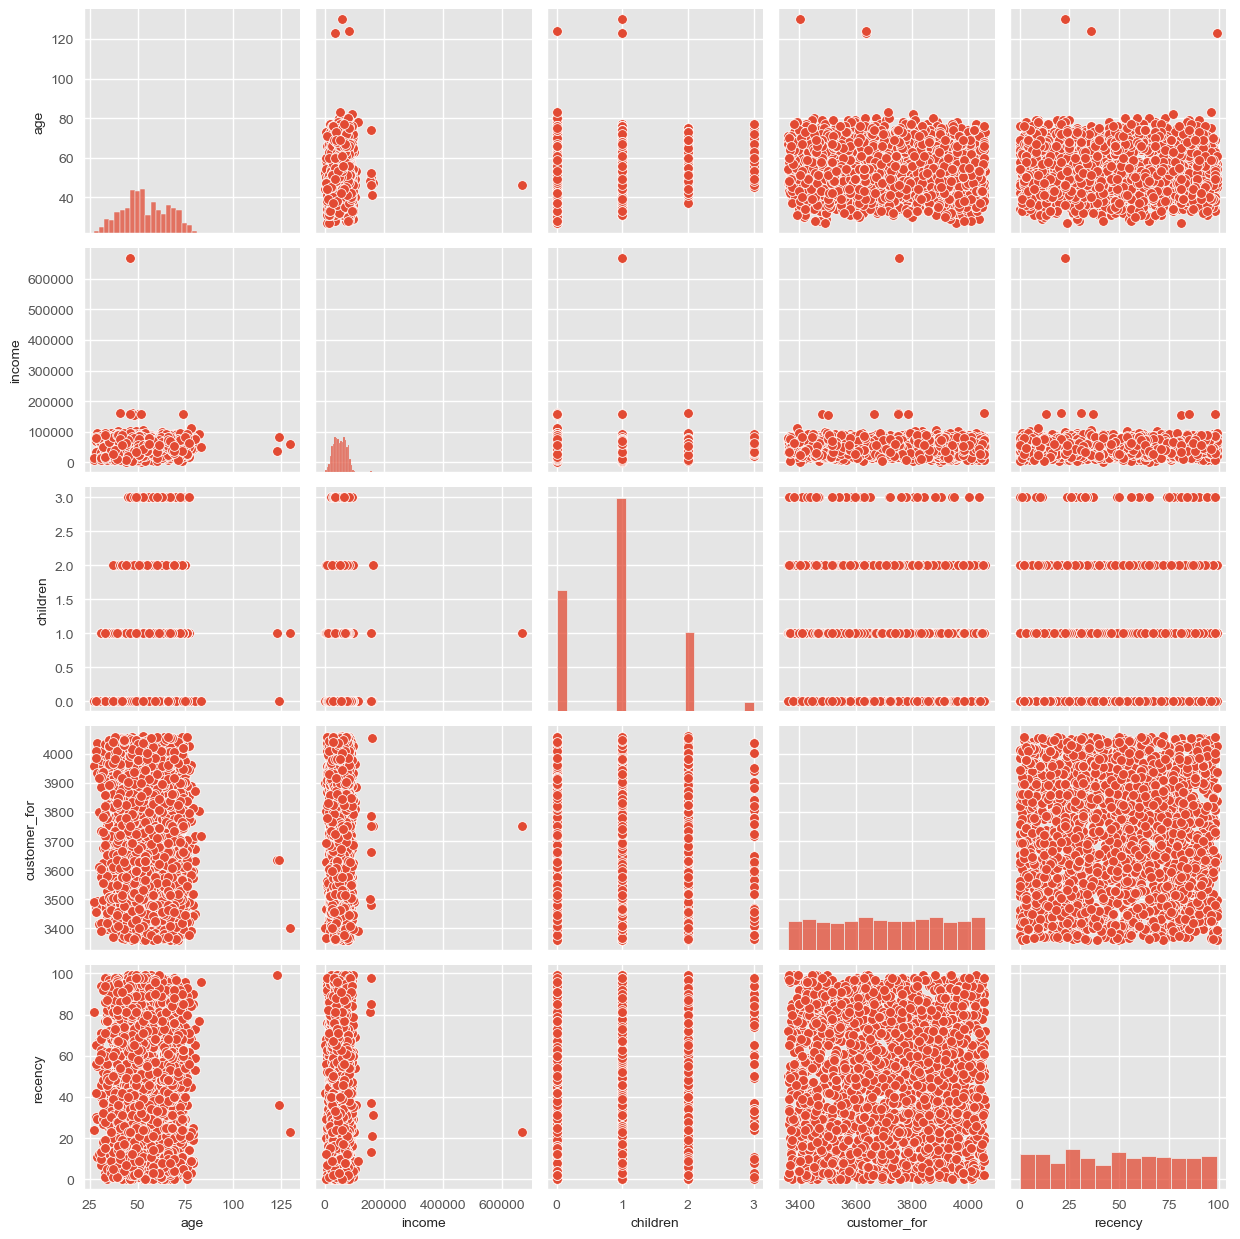

In [30]:
plt.style.use('ggplot')

col = ['age', 'income', 'children', 'customer_for', 'recency']

sns.pairplot(data= df[col], palette= 'Oranges')

plt.tight_layout()
plt.show()

- Como podemos ver en los _pairplots_ anteriores, las variables que contienen valores atípicos más distantes son __'age' e 'income'__. Estas serán limitadas a parámetros más centrales, como una edad menor a 99 años y reducir a menos de $150.000 de ingreso

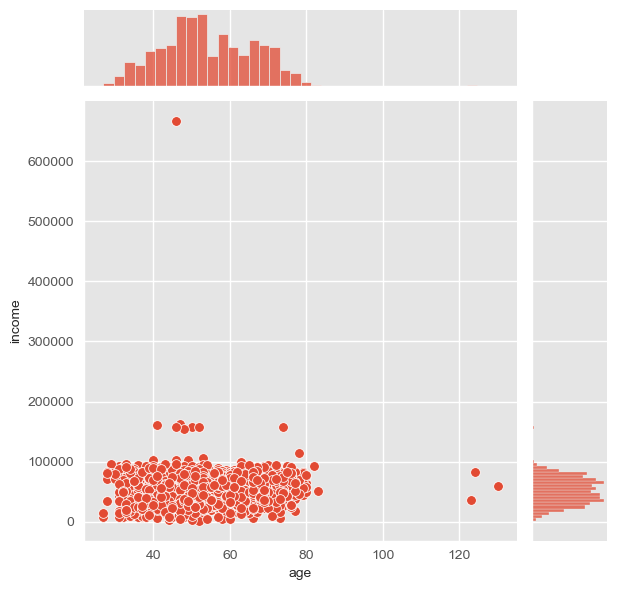

In [31]:
plt.style.use('ggplot')

sns.jointplot(x=df['age'], y= df['income'], data = df, palette= 'Oranges')

plt.show()

In [32]:
df = df[(df['age']<90)]
df = df[(df['income']<150000)]

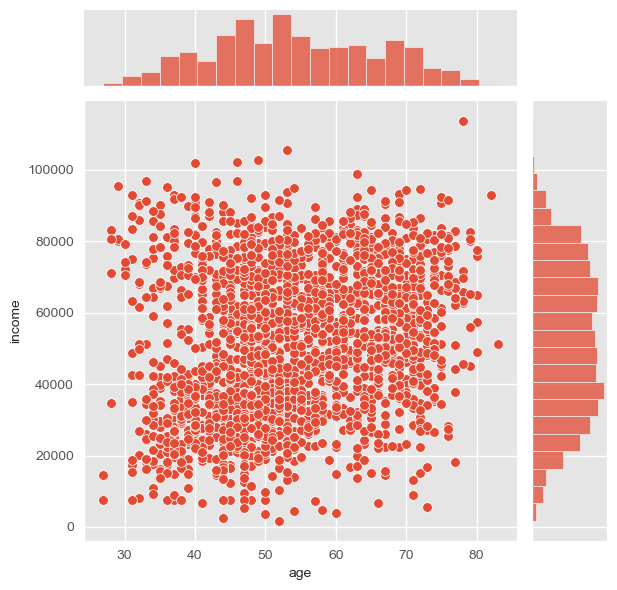

In [33]:
plt.style.use('ggplot')

sns.jointplot(x=df['age'], y= df['income'], data = df, palette= 'Oranges')

plt.show()

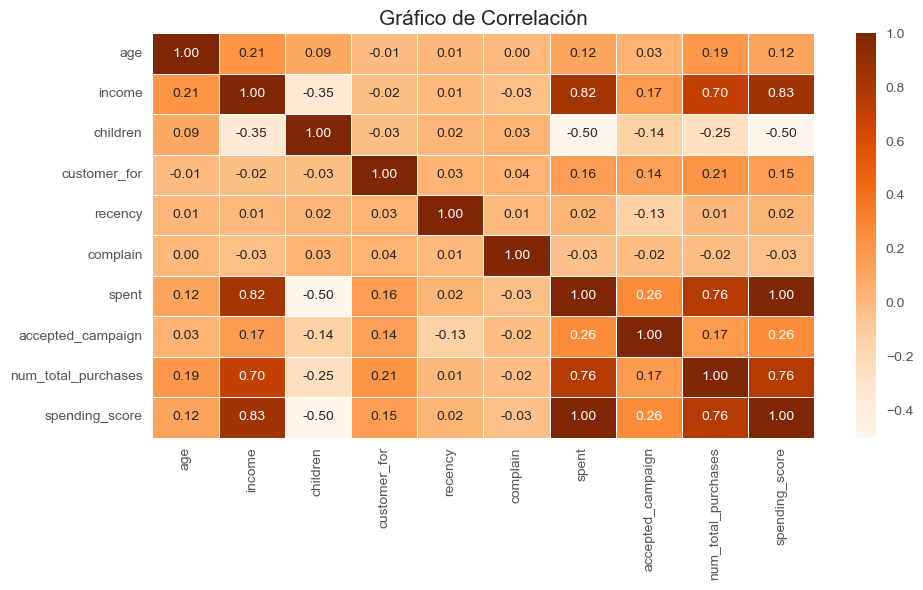

In [34]:
#Correlación entre variables
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

correlacion = df.drop(columns= ['marital_status', 'education']).corr()

sns.heatmap(correlacion, annot=True, linewidth=.5, fmt= '.2f', cmap= 'Oranges')

plt.title("Gráfico de Correlación", fontsize=15)

plt.tight_layout()
plt.show()

## Resumen del Data Cleaning

- Se actualizaron los nombres de las columnas.
- Se creó la columna 'children', siendo la suma de los niños y adolescentes en el hogar.
- La columna 'customer_since' (antes 'Dt_costumer') se convirtió a 'customer_for', indicando la cantidad de días que han transcurrido hasta hoy en las que los clientes se registraron en el comercio.
- Se generó la columna 'spent', siendo la suma de todos los articulos disponibles.
- Se eliminaron las columnas que no aportaban informacion relevante.
- Se realizó el encoding de las variables categóricas.
- Se generó la columna 'accepted_campaign', para indicar en qué campaña el cliente aceptó una, 0 si es que no.
- Se creó la columna 'num_total_purchases', siendo la suma de todas las compras registradas, tanto presencial como web.
- Se calculó el Spending Score mediante lo total gastado, los ingresos y la edad, resultando un porcentaje más representativo.
- Se eliminaron los outliers en 'age' e 'income'.
***

# Visualización

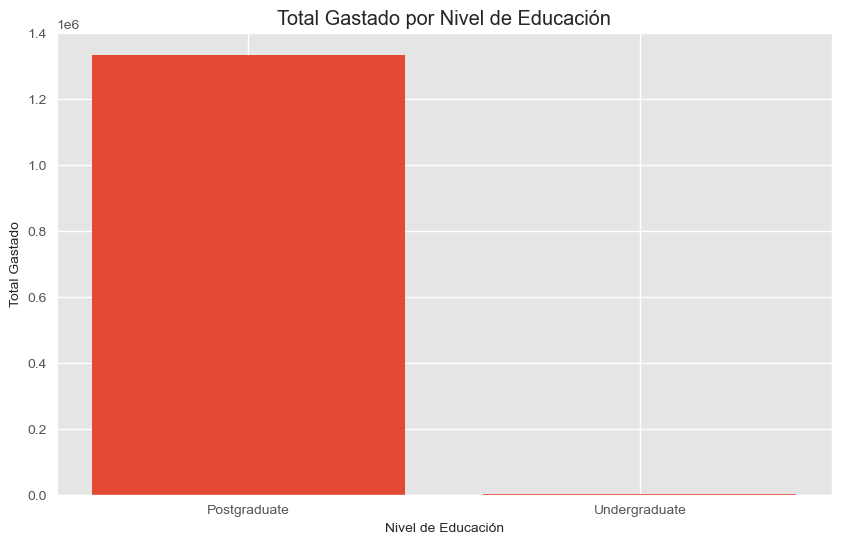

In [35]:
total_spent_by_education = df.groupby('education')['spent'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_spent_by_education['education'], total_spent_by_education['spent'])
plt.xlabel('Nivel de Educación')
plt.ylabel('Total Gastado')
plt.title('Total Gastado por Nivel de Educación')

# Mostrar el gráfico
plt.show()

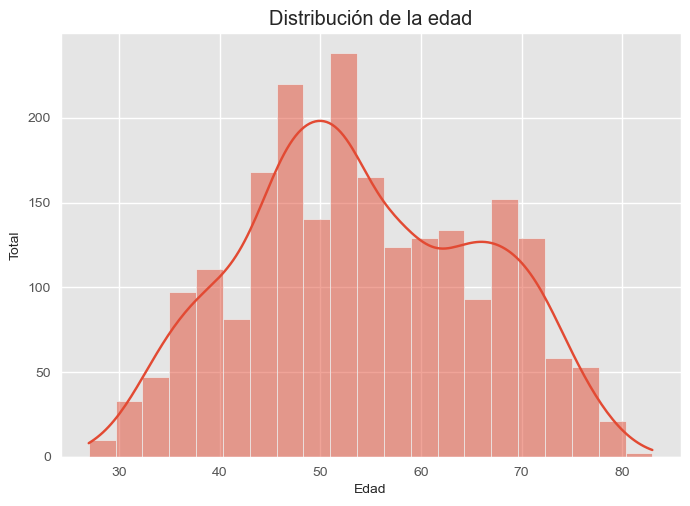

In [36]:
plt.style.use('ggplot')

sns.histplot(df['age'], kde=True, fill=True, palette= 'Oranges')
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Total')

plt.show()

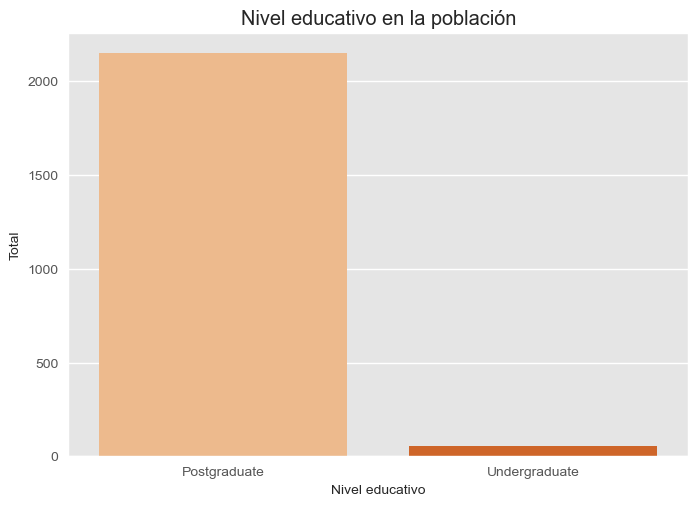

In [37]:
plt.style.use('ggplot')

sns.countplot(data= df, x= df['education'], palette= 'Oranges')
plt.title('Nivel educativo en la población')
plt.xlabel('Nivel educativo')
plt.ylabel('Total')

plt.show()

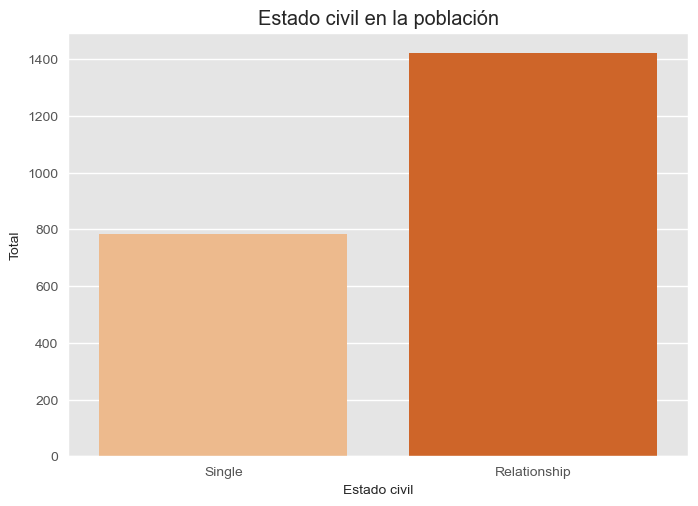

In [38]:
plt.style.use('ggplot')

sns.countplot(data= df, x= df['marital_status'], palette= 'Oranges')
plt.title('Estado civil en la población')
plt.xlabel('Estado civil')
plt.ylabel('Total')

plt.show()

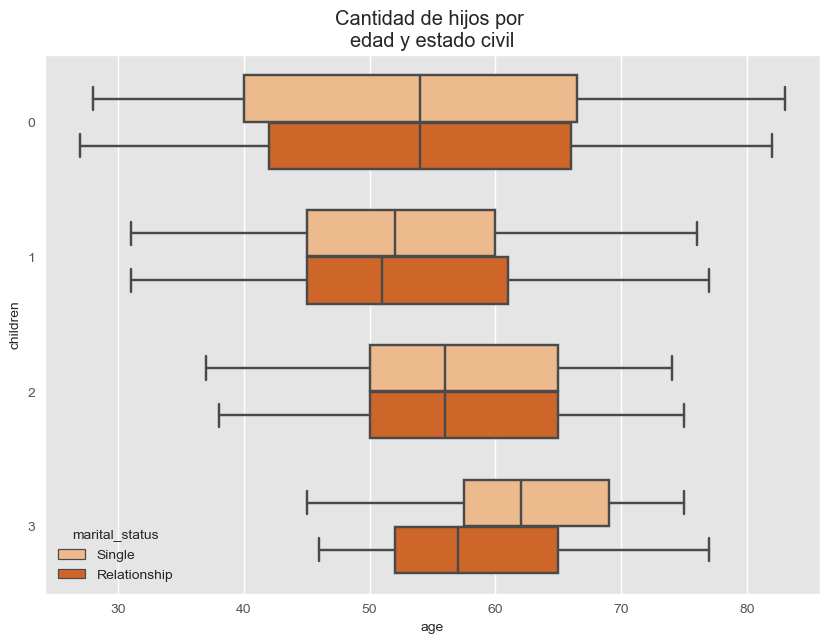

In [39]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 7))

sns.boxplot(data=df,
            x='age',
            y='children',
            hue="marital_status",
            width=0.7,
            orient= 'h',
            palette = "Oranges")

plt.title("Cantidad de hijos por \nedad y estado civil")
plt.show()

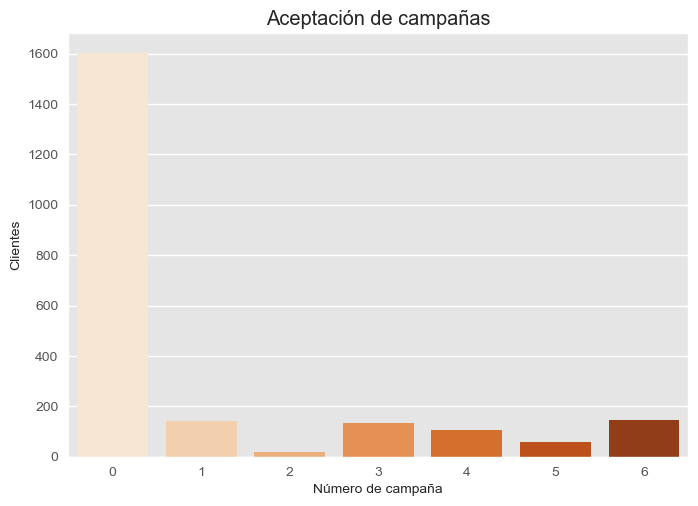

In [40]:
plt.style.use('ggplot')

sns.countplot(data= df, x= df['accepted_campaign'], palette= 'Oranges')
plt.title('Aceptación de campañas')
plt.xlabel('Número de campaña')
plt.ylabel('Clientes')

plt.show()

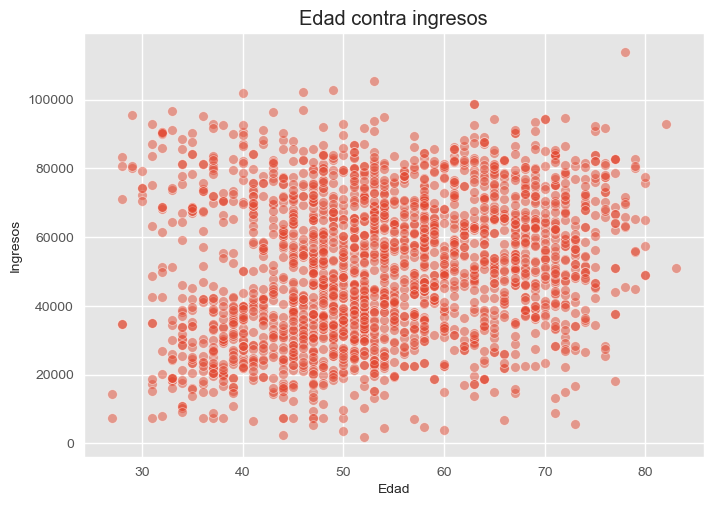

In [41]:
plt.style.use('ggplot')

sns.scatterplot(data= df, x= 'age', y= 'income', alpha= 0.5)
plt.title('Edad contra ingresos')
plt.xlabel('Edad')
plt.ylabel('Ingresos')

plt.show()

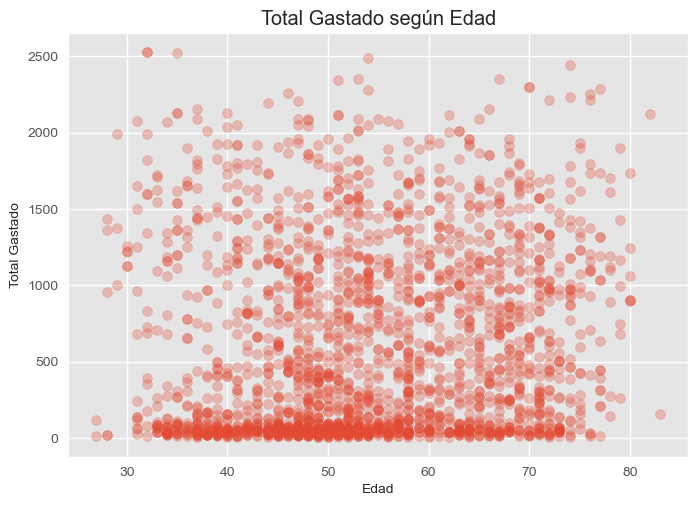

In [42]:
plt.style.use('ggplot')

plt.scatter(df['age'], df['spent'], alpha=0.3)
plt.xlabel('Edad')
plt.ylabel('Total Gastado')
plt.title('Total Gastado según Edad')

plt.show()

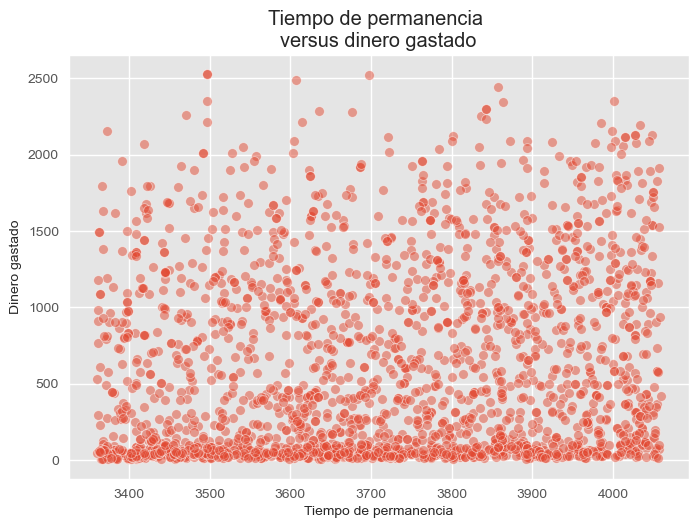

In [43]:
plt.style.use('ggplot')

sns.scatterplot(data= df, x= 'customer_for', y= 'spent', alpha= 0.5)
plt.title('Tiempo de permanencia \nversus dinero gastado')
plt.xlabel('Tiempo de permanencia')
plt.ylabel('Dinero gastado')

plt.show()

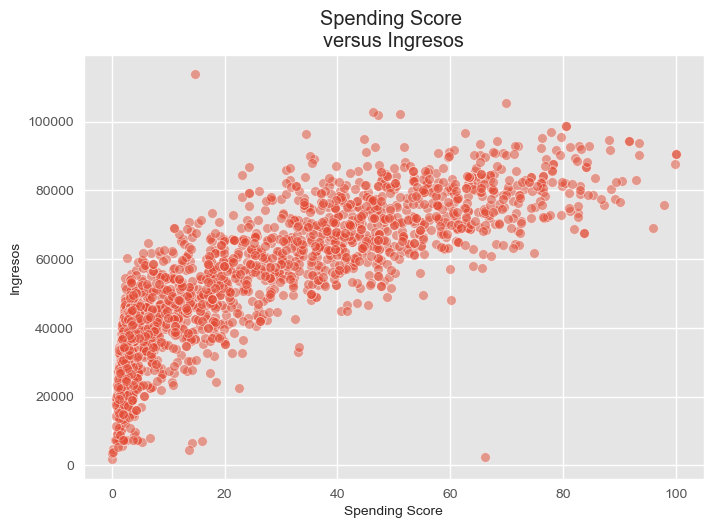

In [44]:
plt.style.use('ggplot')

sns.scatterplot(data= df, x= 'spending_score', y= 'income', palette= 'Oranges', alpha=0.5)
plt.title('Spending Score \nversus Ingresos')
plt.xlabel('Spending Score')
plt.ylabel('Ingresos')

plt.show()

# Clustering
## Escalado de datos

Ahora que tenemos todas las columnas como valores numéricos, aplicaremos un escalado de datos.

In [45]:
columnas_categoricas= df.select_dtypes(include= ['object'])
columnas_categoricas.head()

,education,marital_status
0,Postgraduate,Single
1,Postgraduate,Single
2,Postgraduate,Relationship
3,Postgraduate,Relationship
4,Postgraduate,Relationship


In [46]:
lbl_encode = LabelEncoder()
for i in columnas_categoricas:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [47]:
df1 = df.copy()

In [48]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

scaled_features_df.head()

,age,education,marital_status,income,children,customer_for,recency,complain,spent,accepted_campaign,num_total_purchases,spending_score
0,1.017189,-0.158444,1.347625,0.314651,-1.266589,1.527183,0.310830,-0.095673,1.679323,2.687207,1.328161,1.644791
1,1.273530,-0.158444,1.347625,-0.254877,1.403420,-1.188629,-0.380600,-0.095673,-0.963897,-0.527237,-1.167390,-0.943050
2,0.333612,-0.158444,-0.742046,0.965354,-1.266589,-0.205999,-0.795458,-0.095673,0.281242,-0.527237,0.802782,0.306308
3,-1.289883,-0.158444,-0.742046,-1.206087,0.068415,-1.060245,-0.795458,-0.095673,-0.920675,-0.527237,-0.904700,-0.937714
4,-1.033542,-0.158444,-0.742046,0.322136,0.068415,-0.951612,1.555404,-0.095673,-0.307248,-0.527237,0.540092,-0.289827


## Clustering

In [49]:
def optimise_k_means(data, max_k):
    means= []
    inertias= []
    
    for k in range(1, max_k):
        kmeans= KMeans(n_clusters= k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.style.use('ggplot')
    fig= plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.title('Método Elbow \npara definición de clusters')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    
    plt.show()

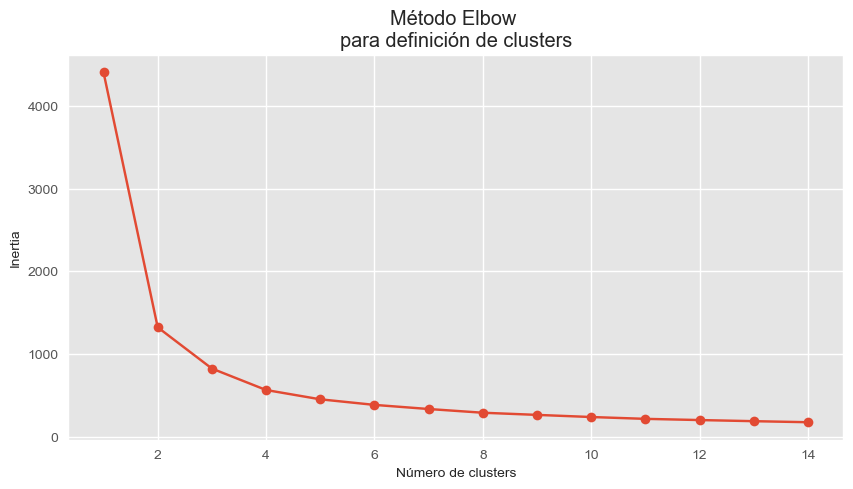

In [50]:
optimise_k_means(scaled_features_df[['income', 'spending_score']], 15)

In [61]:
kmeans = KMeans(n_clusters= 4, random_state= 1)

In [62]:
kmeans.fit(scaled_features_df[['income', 'spending_score']])

KMeans(n_clusters=4, random_state=1)

In [63]:
df['clusters'] = kmeans.fit_predict(df[['income', 'spending_score']])

In [65]:
for k in range(1, 5):
    kmeans= KMeans(n_clusters= k, random_state=1)
    kmeans.fit(scaled_features_df[['income', 'spending_score']])
    df[f'KMeans_{k}'] = kmeans.labels_

### Visualización de Clusters

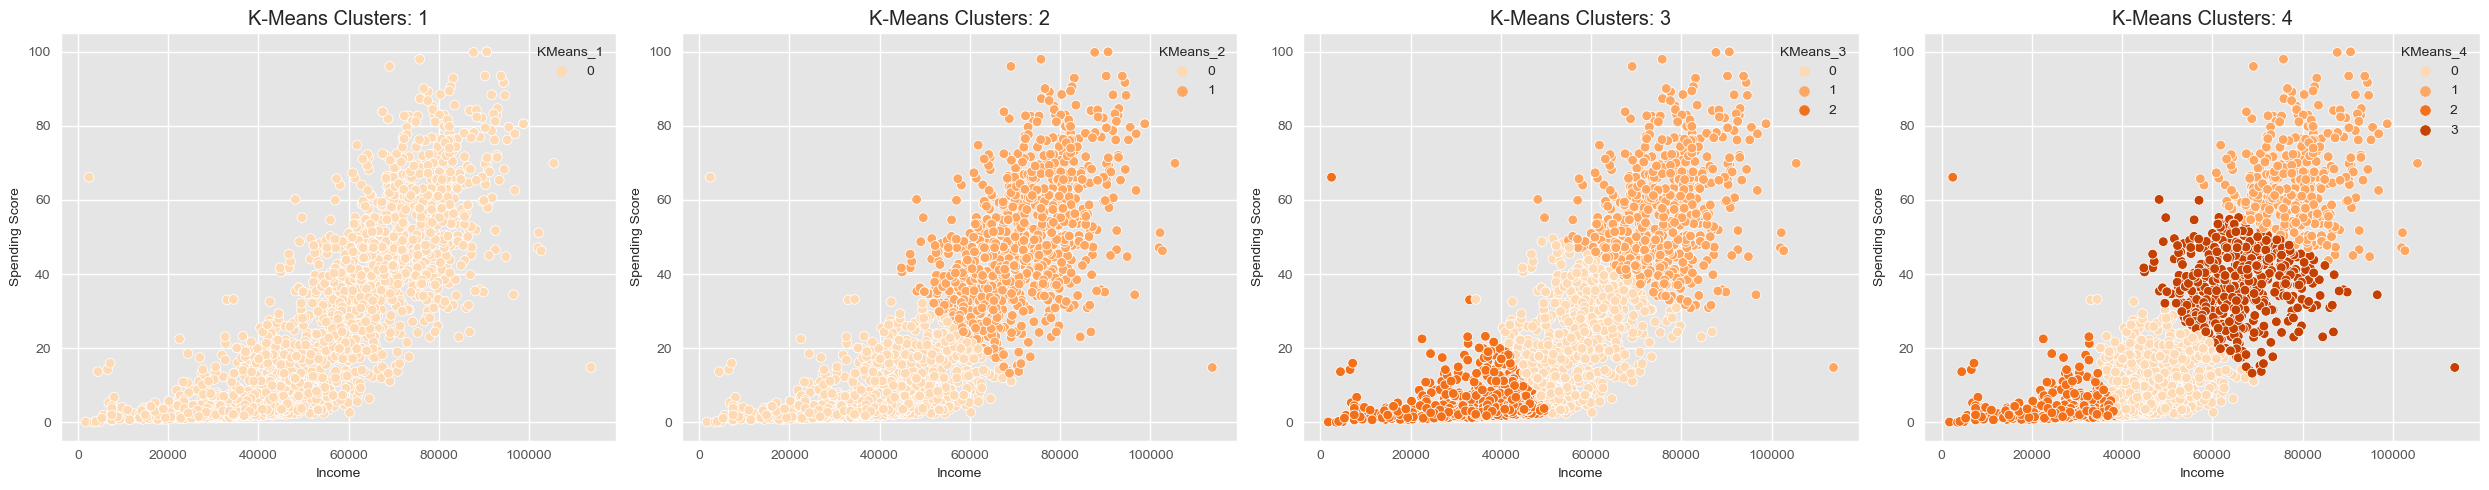

In [66]:
colors = sns.color_palette("Oranges", n_colors=4)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

for i, ax in enumerate(axs, start=1):
    plt.style.use('ggplot')
    cluster_col = f'KMeans_{i}'
    
    scatter = sns.scatterplot(data=df, x='income', y='spending_score', hue=cluster_col, palette=colors, ax=ax)
    
    ax.set_xlabel('Income')
    ax.set_ylabel('Spending Score')
    ax.set_title(f'K-Means Clusters: {i}')
    
plt.tight_layout()
plt.show()


In [67]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns= ['income', 'spending_score'])

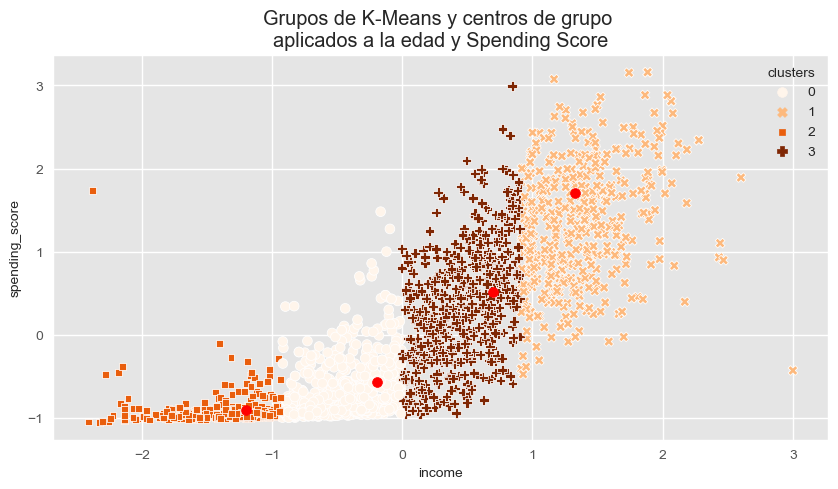

In [68]:
fig, ax= plt.subplots(figsize=(10,5))
ax= sns.scatterplot(x='income', y = 'spending_score', data= scaled_features_df, hue= df['clusters'], style= df['clusters'], ax= ax, palette= 'Oranges')

centers.plot.scatter(x= 'income', y= 'spending_score', ax= ax, s=50, color= 'red')
plt.title('Grupos de K-Means y centros de grupo \naplicados a la edad y Spending Score')
plt.show()

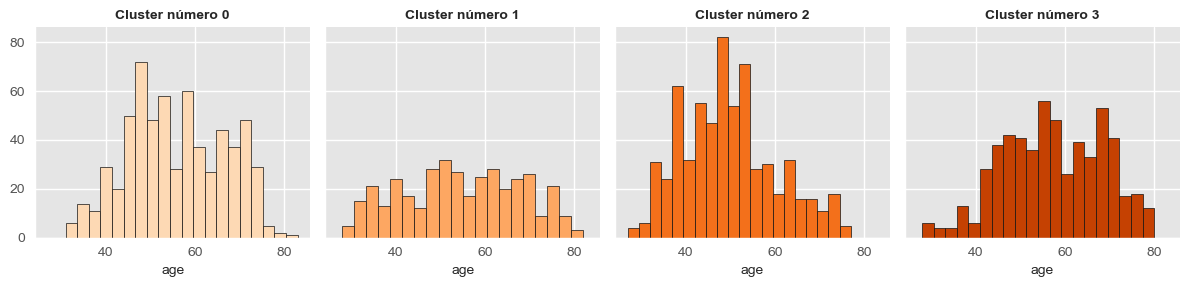

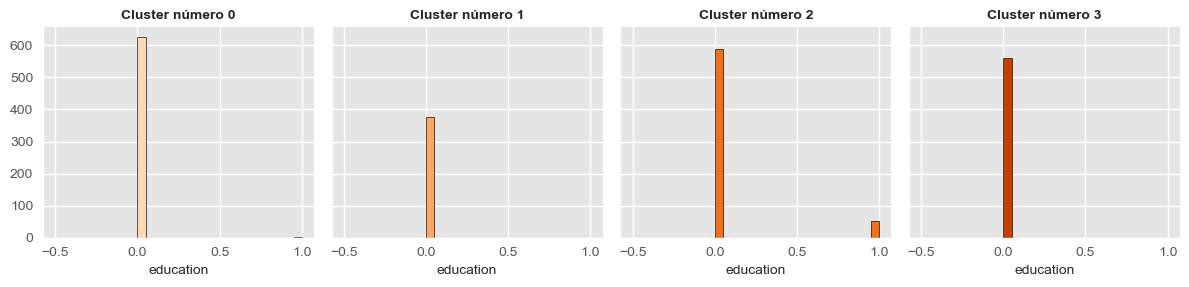

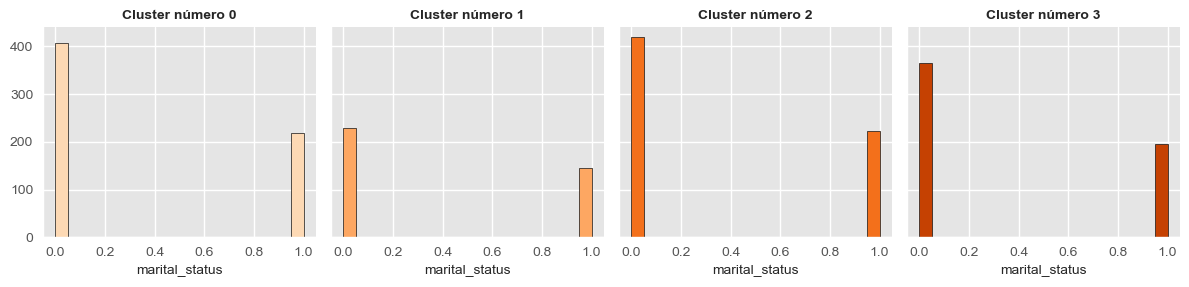

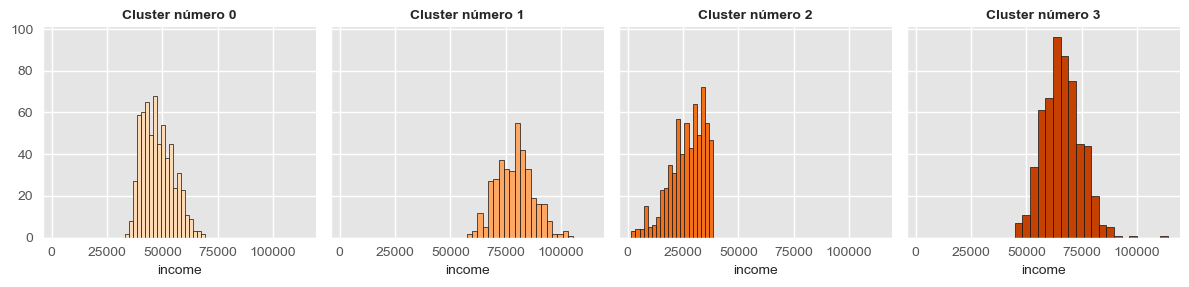

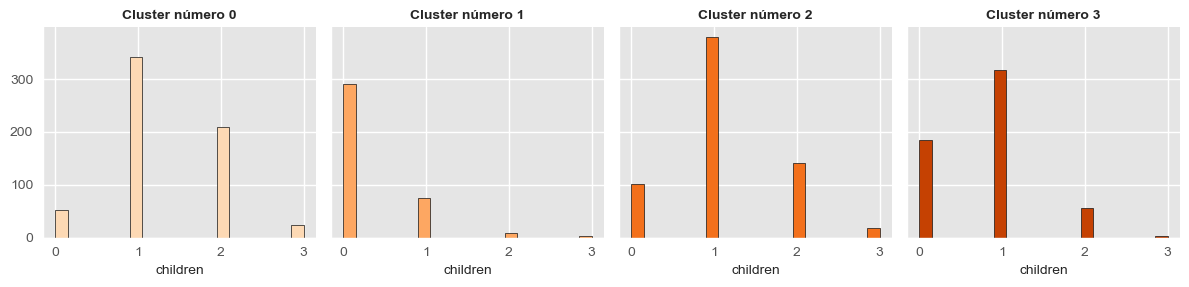

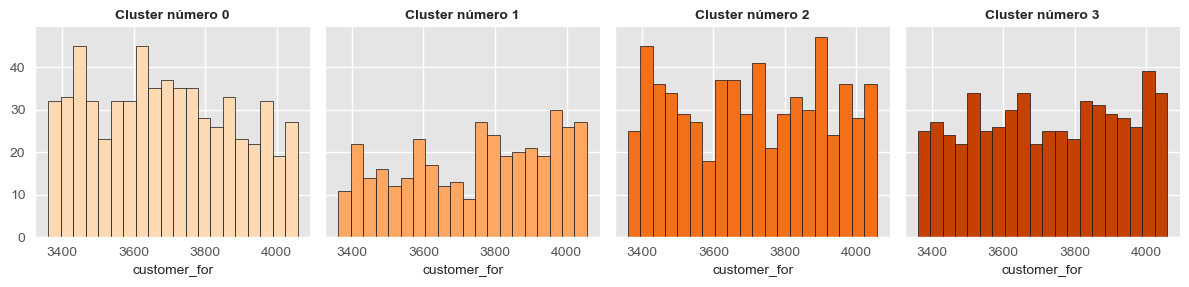

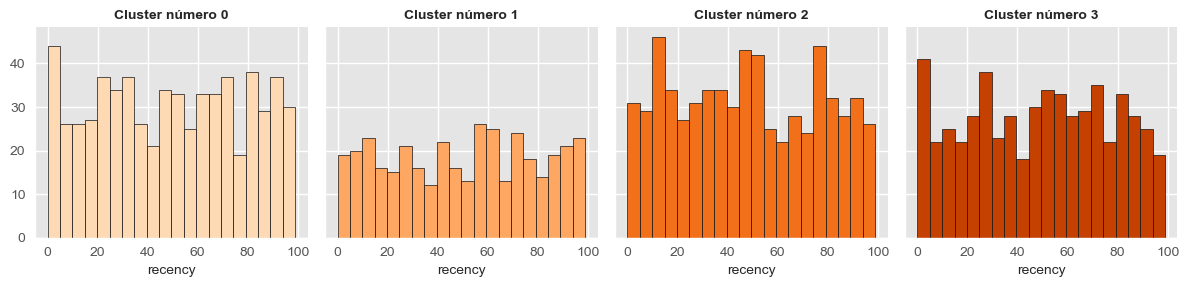

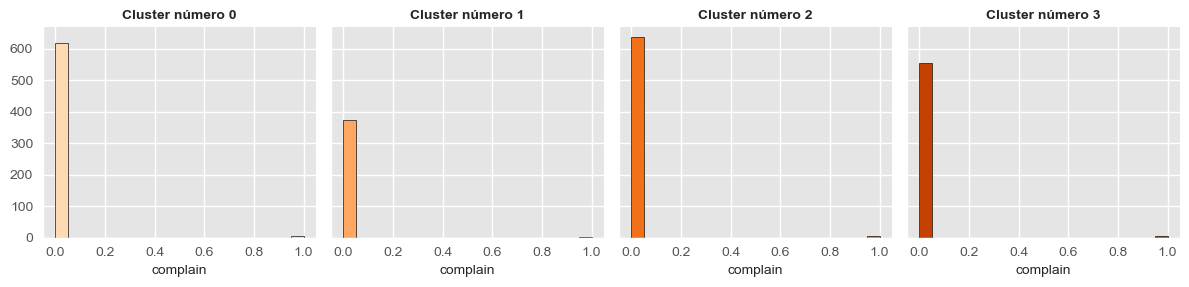

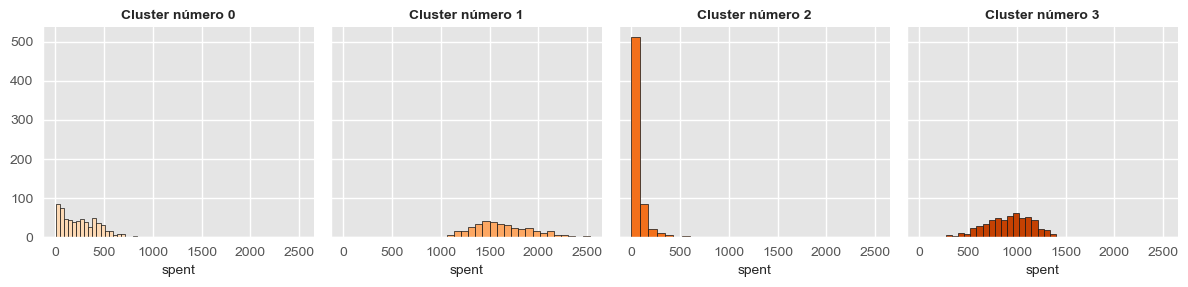

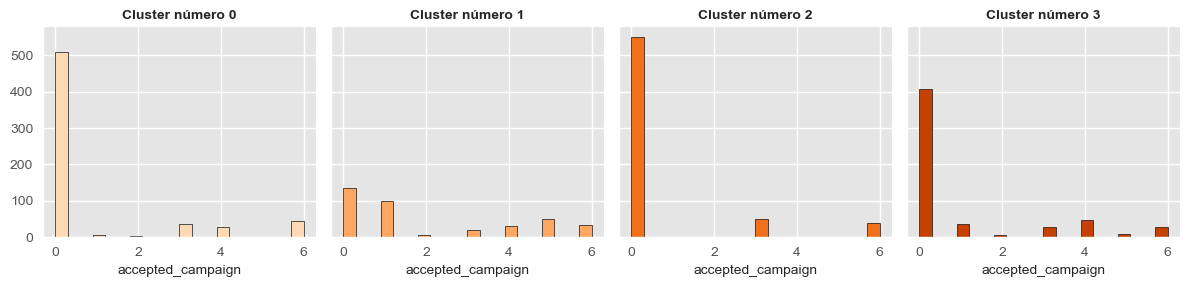

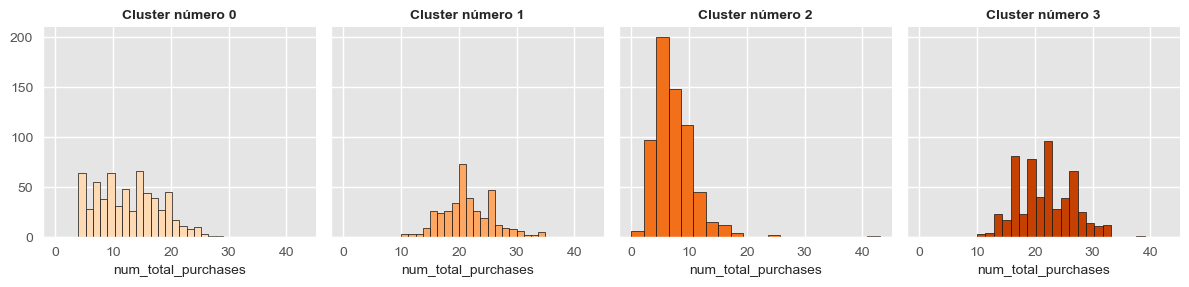

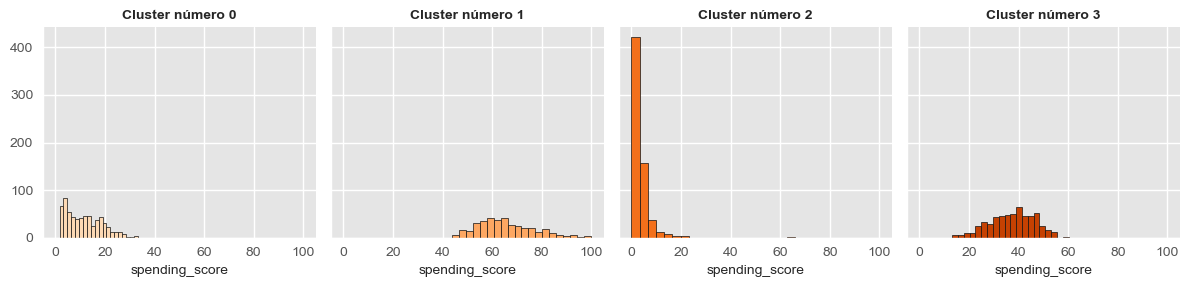

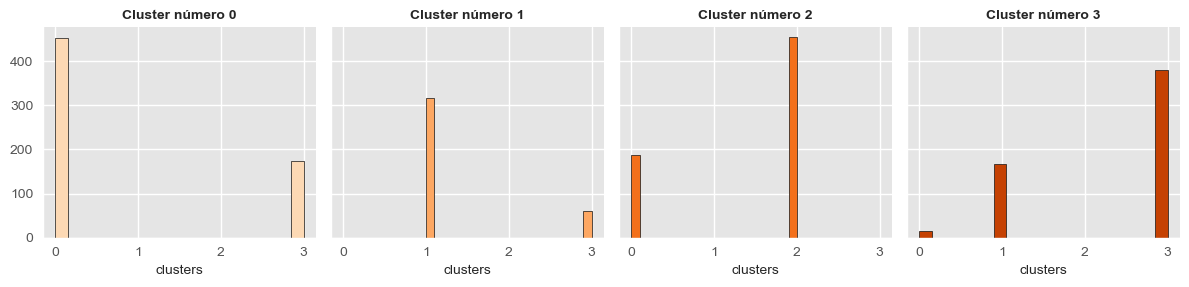

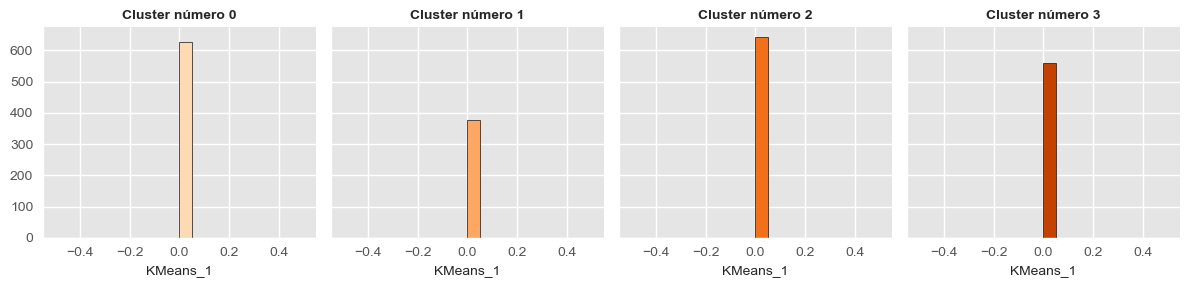

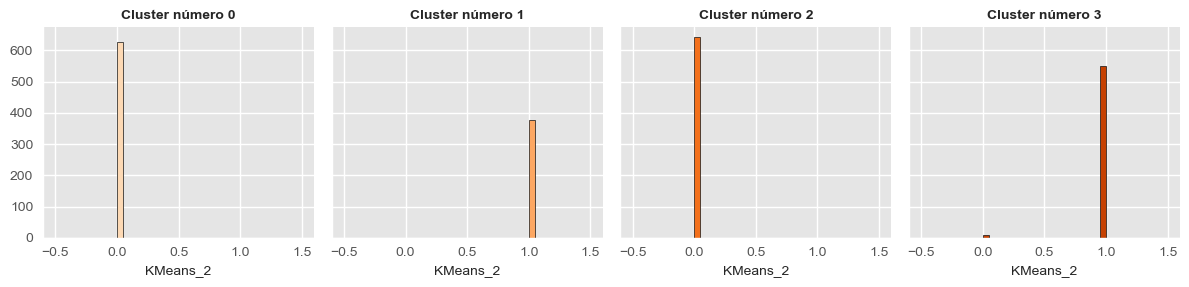

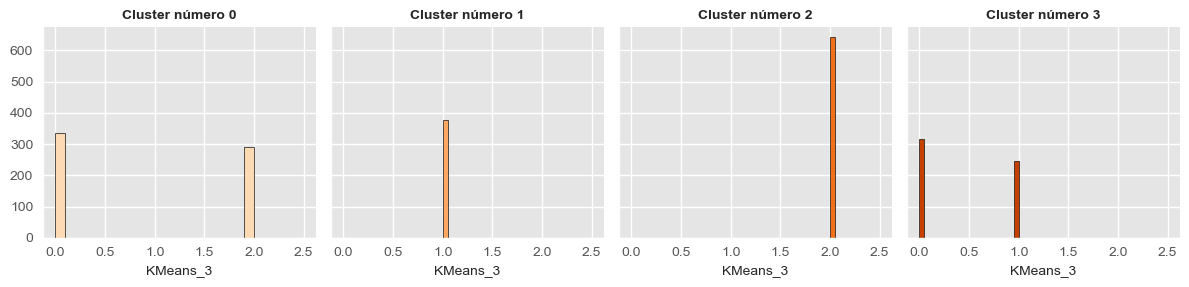

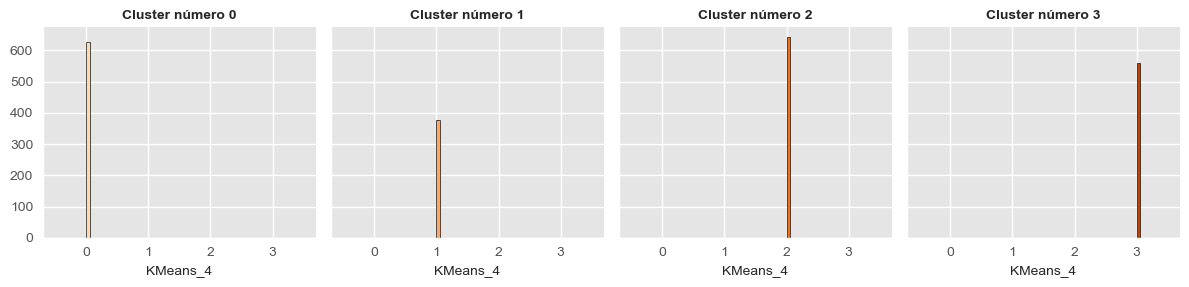

In [70]:
plt.style.use('ggplot')

for i in df.columns:
    diag = sns.FacetGrid(df, col="KMeans_4", hue="KMeans_4", palette="Oranges")
    
    diag.map(plt.hist, i, bins=20, ec="k")
    
    diag.set_xlabels(size=10)
    diag.set_titles(f'Cluster number: {{col_name}}', size=10, fontweight="bold")

    diag.set_titles(col_template='Cluster número {col_name}', size=10, fontweight="bold")

plt.show()

 <p style= "background-color:#f6a85e;font-family:Arial;color:#FFFFFF;font-size:200%;text-align:center;border-radius:20px 20px;border-style:solid;border-width:10px;border-color:#f6a85e;"><b>Análisis de Segmentación de Clientes</b></p>

## Conclusión

Al realizar un análisis de los distintos grupos o clusters, hemos identificado variables que tienen un impacto más significativo que otras. A continuación, presentamos las conclusiones clave para cada cluster:

**Edad (Age):**

    Cluster 0: Personas de entre 50 y 75 años.
    Cluster 1: Personas de todas las edades.
    Cluster 2: Personas de entre 40 y 55 años.
    Cluster 3: Personas de entre 55 y 80 años.


**Educación (Education):**

    Las diferencias educativas entre los clusters son mínimas.
    Cluster 0: Muy poca presencia de educación undergraduate.    
    Cluster 1: Baja cantidad de postgraduate, pero sin educación undergraduate.
    Cluster 2: Mayor proporción de personas con educación undergraduate en comparación con los demás.
    Cluster 3: Ausencia de educación undergraduate.


**Estado Civil (Marital Status):**

    La distribución del estado civil es bastante uniforme en todos los clusters.

**Ingresos (Income):**
    
    Cluster 0: Personas con ingresos entre 30,000 y 65,000 USD.
    Cluster 1: Personas con ingresos entre 75,000 y 100,000 USD (grupo con mayor ingreso).
    Cluster 2: Personas con ingresos entre 0 y 40,000 USD (grupo con menor ingreso).
    Cluster 3: Personas con ingresos entre 50,000 y 75,000 USD.

    
**Número de Hijos (Children):**

    La cantidad de hijos es similar en todos los clusters.

**Tiempo como Cliente (Customer for):**
    
    Cluster 0: Clientes más antiguos.
    Cluster 1: Clientes más nuevos.
    Cluster 2: Clientes de todos los tiempos.
    Cluster 3: Clientes de todos los tiempos.

**Recencia (Recency):**

    La recencia de las compras es uniforme en todos los clusters.

**Quejas (Complain):**

    La presencia de quejas es similar en todos los clusters.

**Gasto (Spent):**

    Cluster 0: Personas con gastos bajos, generalmente entre 0 y 750 USD.
    Cluster 1: Personas con mayor gasto, generalmente entre 1,000 y 2,500 USD.
    Cluster 2: Cluster con menor gasto o gasto mínimo, generalmente no supera los 500 USD.
    Cluster 3: Personas con gastos entre 500 y 1,500 USD.

**Aceptación de Campañas (Accepted Campaign):**
    
    Cluster 0: Menor aceptación, pero más receptivos a campañas recientes.
    Cluster 1: Mayor aceptación de campañas, especialmente la primera campaña.
    Cluster 2: Menor aceptación de campañas.
    Cluster 3: Similar al Cluster 0 pero con un aumento leve en la aceptación.


**Número Total de Compras (Num Total Purchases):**
    
    Cluster 0: Personas con entre 5 y 30 compras.    
    Cluster 1: Personas con entre 10 y 35 compras.
    Cluster 2: Menor cantidad de compras.
    Cluster 3: Personas con entre 10 y 40 compras.


**Puntuación de Gasto (Spending Score):**
    
    Cluster 0: Puntuación entre 0% y 35%.
    Cluster 1: Mayor puntuación de gasto, generalmente entre 40% y 100%.
    Cluster 2: Puntuación cercana a 0.
    Cluster 3: Puntuación entre 20% y 60%.

Estas conclusiones resumen las características más destacadas de cada cluster en relación con las variables analizadas.

## Resumen de cada Cluster: 


**Cluster 1 -  Sabios y Leales:**
- Este cluster se destaca por tener un rango de edades uniforme.
- Sus ingresos son sustancialmente más altos, oscilando entre 75,000 y 100,000 dólares al año en promedio.
- Son clientes de larga data, lo que sugiere una lealtad sólida hacia la marca o empresa.
- Gastan de manera más liberal, tanto en términos de cantidad de compras como en gasto total.
- Son receptivos a campañas de marketing y tienen una propensión a gastar más dinero en comparación con otros clusters.

**Cluster 0 - Novatos en la Búsqueda de Ofertas:**
- Similar al Cluster 1, pero con un mayor énfasis en personas alrededor de los 50 años de edad.
- Sus ingresos son moderados, con un promedio cercano a los 50,000 dólares al año.
- Son clientes relativamente nuevos, lo que sugiere una relación más reciente con la empresa.
- Han gastado menos dinero en sus compras, generalmente en el rango de 0 a 500 dólares, lo que indica una búsqueda de ofertas y un menor gasto en comparación con otros grupos.

**Cluster 3 - Expertos Ahorradores:**
- Este grupo está compuesto en su mayoría por personas de edades entre 40 y 60 años.
- Tienen ingresos relativamente bajos y ganan menos en promedio.
- Son compradores frugales, gastando poco dinero en sus compras.
- Han realizado un número limitado de compras en el pasado.

**Cluster 2 - Gastadores Prudentes:**
- En este grupo, encontramos individuos de edades más avanzadas, en su mayoría entre 40 y 75 años.
- Tienen un ingreso promedio cercano a los 70,000 dólares al año, lo que indica una estabilidad financiera.
- A pesar de tener un ingreso más alto, siguen siendo compradores conservadores, gastando moderadamente.
- Han realizado un número significativamente mayor de compras en comparación con otros clusters.


## Conclusión Final

Con esta información, podríamos sugerir:
- Que los clientes del **Cluster 1 se les eduque respecto a la compañía**, para que así conozcan mejor la empresa y compren más.
- Que la mejor forma de atraer a los clientes del **Cluster 0 es mediante campañas y descuentos**.
- Los clientes del **Cluster 2** podrían **no estar tan interesados** en el negocio.
- **Los clientes ideales** para la compañía son los del **Cluster 0**.

**_Pablo Arriagada Ojeda_ | 2023**